
# Regression

In [2]:
import pandas as pd

## Regression with scikit-learn

In [3]:
#read the dataset
df = pd.read_csv ("data/adult.csv", na_values="?")
df.head()
df.dropna(inplace=True)

In [4]:
y = df.age.values
y

array([50., 38., 53., ..., 38., 44., 35.])

In [5]:
# for the features, we start with removing the class 
df_features = df.drop("age", axis=1)
df_features = pd.get_dummies(df_features)
X = df_features.values
X

array([[ 83311,     13,      0, ...,      0,      1,      0],
       [215646,      9,      0, ...,      0,      1,      0],
       [234721,      7,      0, ...,      0,      1,      0],
       ...,
       [374983,     13,      0, ...,      0,      1,      0],
       [ 83891,     13,   5455, ...,      0,      1,      0],
       [182148,     13,      0, ...,      0,      0,      1]], dtype=int64)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
m = LinearRegression()
m.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
pred = m.predict(X_test)
pred

array([59.87157152, 44.77496466, 41.45969188, ..., 36.89961522,
       45.73163742, 23.62436324])

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
print("Mean absolute error: ",  mean_absolute_error(y_test, pred))
print("Mean squared error: ",  mean_squared_error(y_test, pred))
print("R2-score:", r2_score(y_test, pred))

Mean absolute error:  7.893238964404323
Mean squared error:  101.17787284150634
R2-score: 0.4116859952849786


In [12]:
from sklearn.model_selection import cross_val_score
m = LinearRegression()
scores = cross_val_score(m, X, y, cv=5, scoring='neg_mean_squared_error') 
print (scores)
print ("mean: ", scores.mean())

[-104.79108097 -105.58654515  -99.09939284  -99.24881189 -105.89995223]
mean:  -102.92515661637076


In [13]:
m = RandomForestRegressor()
scores = cross_val_score(m, X, y, cv=5, scoring='neg_mean_squared_error') 
print (scores)
print ("mean: ", scores.mean())

C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[-114.06276692 -112.53188608 -109.91166342 -108.83735686 -114.55432208]
mean:  -111.97959907036889


In [14]:
#show all regression algorithms implemented:
from sklearn.utils.testing import all_estimators
from sklearn import base

estimators = all_estimators()
for name, class_ in estimators:
    #if issubclass(class_, base.RegressorMixin):
    if issubclass(class_, base.ClassifierMixin):
        print(name)

AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
CheckingClassifier
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LinearSVC
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NearestCentroid
NuSVC
OneVsOneClassifier
OneVsRestClassifier
OutputCodeClassifier
PassiveAggressiveClassifier
Perceptron
QuadraticDiscriminantAnalysis
RadiusNeighborsClassifier
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC
VotingClassifier


C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


# Clustering

In [15]:
# We start by Creating some artificial dataset
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.5, random_state=7)
print ("X:\n", X)
print ("y:\n", y)

X:
 [[  1.49733646  -7.48812258]
 [  2.99325669  -8.02785943]
 [  0.91075422  -6.85459798]
 ...
 [ -1.99277631   4.27244383]
 [  0.27351724   5.30653756]
 [ -0.46538214 -11.22162975]]
y:
 [3 3 3 3 0 0 2 0 1 1 3 3 1 1 0 2 2 2 0 0 0 3 2 1 0 1 2 3 0 3 0 0 1 2 3 0 1
 2 1 2 2 0 1 3 3 0 2 0 0 1 2 1 0 3 1 2 1 1 1 1 2 3 3 0 1 1 2 1 3 0 1 1 1 2
 0 0 3 1 3 1 0 1 1 0 0 2 0 1 0 1 1 0 1 3 0 3 0 2 2 2 3 3 1 1 3 3 0 2 1 2 1
 1 1 2 0 0 1 3 3 0 3 3 0 0 1 2 2 0 0 2 1 3 1 0 3 2 0 1 2 3 0 2 3 1 3 0 0 3
 3 0 0 3 0 1 2 2 2 0 2 0 2 1 2 3 3 0 3 3 3 2 3 1 0 3 1 0 1 1 0 0 3 1 0 1 3
 3 0 2 2 0 1 1 3 2 0 0 0 1 1 2 2 1 3 0 2 2 2 2 1 2 0 2 3 1 2 2 1 3 0 3 3 3
 3 1 3 0 3 1 3 2 2 0 0 3 2 1 2 2 3 0 1 1 2 2 3 1 2 3 3 3 2 3 2 3 0 2 3 2 0
 1 0 1 0 0 1 1 0 2 0 3 2 1 3 0 0 3 0 0 2 1 2 0 1 3 1 2 1 2 0 0 0 3 0 2 2 0
 3 3 2 0 2 0 3 1 0 1 3 1 2 2 3 0 0 1 0 1 3 0 0 3 2 3 3 0 0 1 0 0 3 3 2 2 3
 2 2 2 0 1 1 2 2 2 0 0 0 1 0 2 1 3 0 3 1 3 1 3 2 0 2 2 1 2 2 1 2 0 0 1 3 1
 2 2 1 2 2 1 0 3 2 0 0 1 0 0 1 2 1 1 0 1 1 0 2 2 3 0 3 2 0 3 0

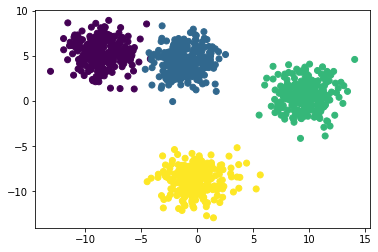

In [16]:
# plot the data:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y)

In [17]:
# Do some clustering with k-means
from sklearn.cluster import KMeans
clust = KMeans(n_clusters=4)
y_cl = clust.fit_predict(X)
y_cl

array([1, 1, 1, 1, 2, 2, 3, 2, 0, 0, 1, 1, 0, 0, 2, 3, 3, 3, 2, 2, 2, 1,
       3, 0, 2, 0, 3, 1, 2, 1, 2, 2, 0, 3, 1, 2, 0, 3, 0, 3, 3, 2, 0, 1,
       1, 2, 3, 2, 2, 0, 3, 0, 2, 1, 0, 3, 0, 0, 0, 0, 3, 1, 1, 2, 0, 0,
       3, 0, 1, 2, 0, 0, 0, 3, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 2, 3, 2, 0,
       2, 0, 0, 2, 0, 1, 2, 1, 2, 3, 3, 3, 1, 1, 0, 0, 1, 1, 2, 3, 0, 3,
       0, 0, 0, 3, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 3, 3, 2, 2, 3, 0, 1,
       0, 2, 1, 3, 2, 0, 3, 1, 2, 3, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 0,
       3, 3, 3, 2, 3, 2, 3, 0, 3, 1, 1, 2, 1, 1, 1, 3, 1, 0, 0, 1, 0, 2,
       0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 3, 3, 2, 0, 0, 1, 3, 2, 2, 2, 0,
       0, 3, 3, 0, 1, 2, 3, 3, 3, 3, 0, 3, 2, 3, 1, 0, 3, 3, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 2, 1, 0, 1, 3, 3, 2, 2, 1, 3, 0, 3, 3, 1, 2, 0, 0,
       3, 3, 1, 0, 3, 1, 1, 1, 3, 1, 3, 1, 2, 3, 1, 3, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 3, 2, 1, 3, 0, 1, 2, 2, 1, 2, 2, 3, 0, 3, 2, 0, 1, 0, 3,
       0, 3, 2, 2, 2, 1, 2, 3, 3, 2, 1, 1, 3, 2, 3,

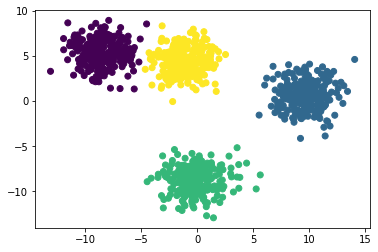

In [18]:
# We can visualize the clusters in the same way
clust = KMeans(n_clusters=4)
y_cl = clust.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_cl)

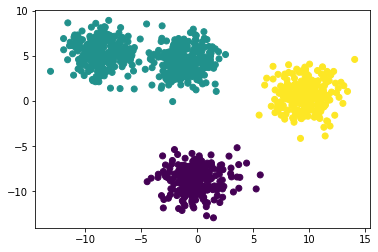

In [19]:
# What happens if we have a 'wrong' number of clusters?
clust = KMeans(n_clusters=3)
y_cl = clust.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_cl)

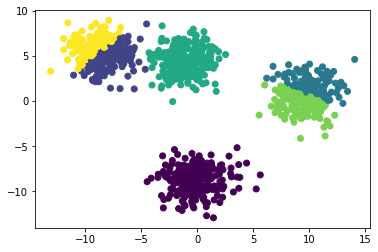

In [20]:
# What happens if we have a 'wrong' number of clusters?
clust = KMeans(n_clusters=6)
y_cl = clust.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_cl)

## How can we find a good number of clusters k?

In [21]:
from sklearn import metrics

In [45]:
# How to compute a silhouette score?
clust = KMeans(n_clusters=5)
y_cl = clust.fit_predict(X)
metrics.silhouette_score(X, y_cl, metric='euclidean')

0.6267332256839895

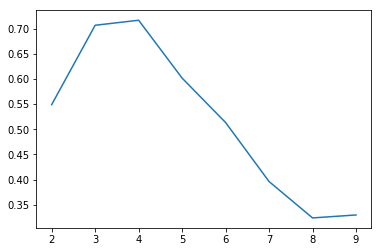

In [46]:
ks = range(2,10)
scores = []
for k in ks:
    clust = KMeans(n_clusters=k)
    y_cl = clust.fit_predict(X)
    scores.append(metrics.silhouette_score(X, y_cl, metric='euclidean'))
plt.plot(ks,scores)
    

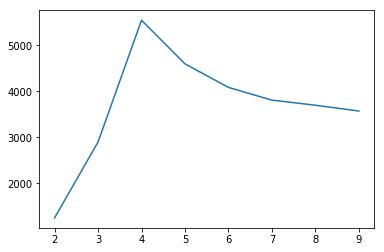

In [47]:
# There are alternative scores, you can use...
ks = range(2,10)
scores = []
for k in ks:
    clust = KMeans(n_clusters=k)
    y_cl = clust.fit_predict(X)
    scores.append(metrics.calinski_harabaz_score(X, y_cl))
plt.plot(ks,scores)